# 利用 Pandas 进行简单数据分析

> 本文来自于 猴子数据分析社群的通关作业，因为课程是用 R 语言教的，我是用 Python 实现了一遍，所以参考的文档也都列了出来，总结的也挺不容易的，欢迎同学吐槽。
> 坚持看英文资料，坚持用 Google，坚持查官方文档。将原则很简单，虽然不可能一蹴而就，但是毕竟已经开始了。

* 数据来源到猴子聊人物的微信公众号找，这里也直接列出来方便一点 <https://pan.baidu.com/s/1qYFL8O8#list/path=%2F>

## 1. 读取 excel

In [1]:
# coding=utf-8

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [2]:
file_name = "../源代码和数据/朝阳医院2016年销售数据.xlsx"

xls_file = pd.ExcelFile(file_name, dtype='object') # 统一先按照str读入，之后转换

table = xls_file.parse('Sheet1', dtype='object')

In [3]:
print type(xls_file)
print type(table)

<class 'pandas.io.excel.ExcelFile'>
<class 'pandas.core.frame.DataFrame'>


In [4]:
table.head()

,购药时间,社保卡号,商品编码,商品名称,销售数量,应收金额,实收金额
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,001616527,NaN,三九感冒灵,NaN,NaN,NaN
2,2016-01-01 星期五,001616528,236701,三九感冒灵,7,196,182
3,2016-01-02 星期六,001616528,236701,三九感冒灵,3,84,84
4,2016-01-06 星期三,0010070343428,236701,三九感冒灵,3,84,73.92


## 2. 数据预处理

### 2.1 查看基本信息

In [5]:
print table.shape
print table.index
print table.columns

(6579, 7)
RangeIndex(start=0, stop=6579, step=1)
Index([u'购药时间', u'社保卡号', u'商品编码', u'商品名称', u'销售数量', u'应收金额', u'实收金额'], dtype='object')


In [6]:
print table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6579 entries, 0 to 6578
Data columns (total 7 columns):
购药时间    6577 non-null object
社保卡号    6578 non-null object
商品编码    6577 non-null object
商品名称    6578 non-null object
销售数量    6577 non-null object
应收金额    6577 non-null object
实收金额    6577 non-null object
dtypes: object(7)
memory usage: 359.9+ KB
None


In [7]:
print table.count()

购药时间    6577
社保卡号    6578
商品编码    6577
商品名称    6578
销售数量    6577
应收金额    6577
实收金额    6577
dtype: int64


### 2.2 列重命名

pandas 的 rename 方法  <https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.rename.html>

In [8]:
col = {u'购药时间':'time',\
       u'社保卡号':'cardno',\
       u'商品编码':'drugId',\
       u'商品名称':'drugName',\
       u'销售数量':'saleNumber',\
       u'应收金额':'virtualmoney',\
       u'实收金额':'actualmoney'}

In [9]:
table.rename(columns = col, inplace = True)

In [10]:
table.head()

,time,cardno,drugId,drugName,saleNumber,virtualmoney,actualmoney
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,001616527,NaN,三九感冒灵,NaN,NaN,NaN
2,2016-01-01 星期五,001616528,236701,三九感冒灵,7,196,182
3,2016-01-02 星期六,001616528,236701,三九感冒灵,3,84,84
4,2016-01-06 星期三,0010070343428,236701,三九感冒灵,3,84,73.92


### 2.3 删除缺失值

pandas 的 dropna 方法  <https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.dropna.html?highlight=dropna#pandas.DataFrame.dropna|>

In [29]:
dropna1 = table.dropna()
dropna2 = table.dropna(how = 'all') # 参数设定是，所有值为 NA 才删除掉

In [12]:
dropna1.head()

,time,cardno,drugId,drugName,saleNumber,virtualmoney,actualmoney
2,2016-01-01 星期五,001616528,236701,三九感冒灵,7,196,182
3,2016-01-02 星期六,001616528,236701,三九感冒灵,3,84,84
4,2016-01-06 星期三,0010070343428,236701,三九感冒灵,3,84,73.92
5,2016-01-11 星期一,0013389528,236701,三九感冒灵,1,28,28
6,2016-01-15 星期五,00101554328,236701,三九感冒灵,8,224,208


In [13]:
dropna2.head()

,time,cardno,drugId,drugName,saleNumber,virtualmoney,actualmoney
1,NaN,001616527,NaN,三九感冒灵,NaN,NaN,NaN
2,2016-01-01 星期五,001616528,236701,三九感冒灵,7,196,182
3,2016-01-02 星期六,001616528,236701,三九感冒灵,3,84,84
4,2016-01-06 星期三,0010070343428,236701,三九感冒灵,3,84,73.92
5,2016-01-11 星期一,0013389528,236701,三九感冒灵,1,28,28


### 2.4 处理日期

* 一些列表推导式的参考内容 <https://docs.python.org/2.7/tutorial/datastructures.html?highlight=list%20comprehensions>
* .to_datetime 方法 <https://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html>

In [31]:
# 定义一个把 time 行中日期和星期分开的函数，分别返回日期和星期构成的 list
def split_datetime_weekday(t_w_column):
    
    datetime_list = [x.split()[0] for x in t_w_column ] # 列表推导式的简写
    weekday_list = [x.split()[1] for x in t_w_column]
    
    return datetime_list, weekday_list


In [33]:
datetime_list, weekday_list = split_datetime_weekday(dropna1.loc[:,'time'])
dropna1.loc[:,'datetime'] = pd.to_datetime(datetime_list) 
# 这里直接用了一个 .to_datetime 方法，将所有数据的改成了 datetime64 的类型
dropna1.loc[:, 'weekday'] = weekday_list

In [16]:
dropna1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6577 entries, 2 to 6578
Data columns (total 9 columns):
time            6577 non-null object
cardno          6577 non-null object
drugId          6577 non-null object
drugName        6577 non-null object
saleNumber      6577 non-null object
virtualmoney    6577 non-null object
actualmoney     6577 non-null object
datetime        6577 non-null datetime64[ns]
weekday         6577 non-null object
dtypes: datetime64[ns](1), object(8)
memory usage: 513.8+ KB


### 2.5 数据类型转换

* saleNumber    virtualmoney    actualmoney  三个 columns 的数据类型转换

* astype 方法 <https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.astype.html?highlight=astype#pandas.DataFrame.astype>

In [17]:
dropna1['saleNumber'] = dropna1['saleNumber'].astype('float64')
dropna1['virtualmoney'] = dropna1['virtualmoney'].astype('float64')
dropna1['actualmoney'] = dropna1['actualmoney'].astype('float64')

/Users/yuyang/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/yuyang/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/yuyang/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docum

* <http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy>



* 对比两种索引形式 1. df[index][column]  2. df.loc[index:column] 为什么 后者更好

1. 是先索引第一层级[index]，返回了 Dataframe 的对象，然后对这个对象再次索引 [column],所以可以看做是一种连续两次的线性操作
2. iloc 索引则是利用了一个组合的索引，pandas 可以把这个返回对象当做一个整体处理，同时速度上也比第一种快。

In [18]:
dropna1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6577 entries, 2 to 6578
Data columns (total 9 columns):
time            6577 non-null object
cardno          6577 non-null object
drugId          6577 non-null object
drugName        6577 non-null object
saleNumber      6577 non-null float64
virtualmoney    6577 non-null float64
actualmoney     6577 non-null float64
datetime        6577 non-null datetime64[ns]
weekday         6577 non-null object
dtypes: datetime64[ns](1), float64(3), object(5)
memory usage: 513.8+ KB


## 2.6 排序

* 按销售时间对数据进行降序排列

* 老的 sort 方法好像已经改名成为 sort_values 了，找了半天。<https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sort_values.html?highlight=sort_values#pandas.DataFrame.sort_values>

* DataFrame.sort_values(by, axis=0, ascending=True, inplace=False, kind='quicksort', na_position='last')  

In [19]:
dropna1.sort_values("time").head(3)

,time,cardno,drugId,drugName,saleNumber,virtualmoney,actualmoney,datetime,weekday
2,2016-01-01 星期五,001616528,236701,三九感冒灵,7.0,196.0,182.0,2016-01-01,星期五
401,2016-01-01 星期五,0010074599128,2367011,开博通,5.0,140.0,125.0,2016-01-01,星期五
400,2016-01-01 星期五,0010072612028,2367011,开博通,1.0,28.0,25.0,2016-01-01,星期五


## 3 简单数据分析

* 月均消费次数
* 月均消费金额
* 客单价
* 消费趋势

### 3.1 月均消费次数

要点：
* 同一个日期和同一个社保卡号的多个消费记录算作一次消费，
* 可以将单独两列抽出来单独分析，先去重复，然后再计数
* 这个分析可以画一个每个月的消费次数的柱状图

data_consume_unique 是将 datetime cardno 去重后复制出来的新的 Dataframe

In [20]:
data_consume_unique = dropna1.drop_duplicates(subset=['datetime', 'cardno']).copy(deep = True)

* drop_duplicates 的说明 <https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.drop_duplicates.html> 选取 datetime 和 cardno 作为筛选的子列
* consume_time_date_ser 是将 datetime 作为 index，构建的 cardno 的时间序列。
* 注：构建时间序列的内容一定要转换成列表。我自己也是探索了半天，用 Series 的数据，填充的都是 NA。

In [21]:
consume_time_date_ser = pd.Series(list(data_consume_unique['cardno']), index = data_consume_unique['datetime'])

* 之前用了 sort_values 方法，果然也有 sort_index  <https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sort_index.html>，这里通过排序时间序列的 index，分别取出开始日期和结束日期
* timedelta 数据类型的 一些特性操作 <https://docs.python.org/2.7/library/datetime.html?highlight=timedelta#datetime.timedelta>，这里用了 `.days ` 提取出了时间区间的天数

In [22]:
# 排序之后将日期结尾 减去 日期开头，计算总天数
date_interval = consume_time_date_ser.sort_index().index[-1]-consume_time_date_ser.sort_index().index[0]
# 利用总天使，计算总月数，其中 timedelta 数据类型的 attribute 参见官方文档
# 这里用到了 days，提取出了总天数
month_count = date_interval.days/30 + 1 # 我觉得这个月份应该是要 + 1 的，猴子老师课程里面没加

month_consume = consume_time_date_ser.count()/month_count
print month_consume

771


* 通过时间序列的 month 分组，之后用 `.count()` 来计算组内总和,也就是每月消费次数

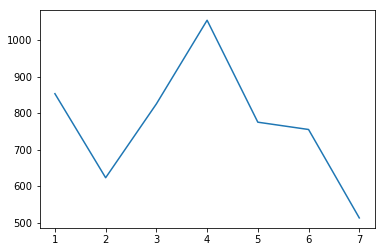

In [23]:
month_time = consume_time_date_ser.groupby(consume_time_date_ser.index.month).count()
plt.plot(month_time.index, month_time)
plt.show()

### 3.2 月均消费金额

* 月均消费金额  = 总消费金额 / 月份数
* 这里可以画一个每月消费总额的柱状图

In [24]:
total_money = dropna1['actualmoney'].sum()
month_money = total_money / month_count
print month_money # 43518.6085714

43518.6085714


* 构建以实收金额 actualmoney 的时间序列 data_consume_actual

In [25]:
data_consume_actual = pd.Series(list(dropna1['actualmoney']), index = list(dropna1['datetime']))

* 通过 month 分组，对组内数据进行求和，求和结果为每月的实收金额总和

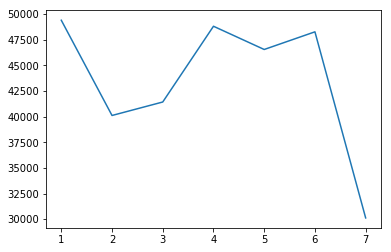

In [26]:
month_consume = data_consume_actual.groupby(data_consume_actual.index.month).sum()
plt.plot(month_consume.index, month_consume)
plt.show()

### 3.3 客单价

* 客单价（per customer transaction）是指商场（超市）每一个顾客平均购买商品的金额，客单价也即是平均交易金额。

In [27]:
consume_num = len(dropna1['cardno'].unique())
print consume_num # 所有不重复医保卡号码，总数量
pct = total_money / consume_num
print pct # 客单价

2426
125.568944765


### 3.4 消费趋势 

* 分组也是根据 week 进行的分组，之后求和，类似于上面按照月的来求和
* 画出随着 week 变化与 实收金额 actualmoney 的变化趋势

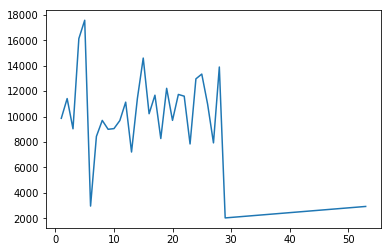

In [28]:
week_consume = data_consume_actual.groupby(data_consume_actual.index.week).sum()
plt.plot(week_consume.index, week_consume)
plt.show()